In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sndata
from sndata.csp import DR1
from sndata.csp import DR3
dr1 = DR1()
dr3 = DR3()

In [3]:
dr1.download_module_data()
dr3.download_module_data()

In [4]:
group = pd.read_csv('~/Desktop/SN-Spectral-Evolution/results/final_csp.csv')
group.head()

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes
0,2004ef,2453255.66,pW2,3929.0819,4068.8654,NaN,0.0,NaN,12.432846,0.0,3.538539,7.091278e-15,0.0,2.246094e-15,0,0,NaN
1,2004ef,2453255.66,pW3,4068.8654,4464.1151,13176.598888,0.0,211.378099,86.793896,0.0,8.082350,5.371763e-14,0.0,6.300415e-15,0,0,NaN
2,2004ef,2453255.66,pW4,4526.7766,5066.6299,21673.924415,0.0,124.766254,169.348571,0.0,2.464627,8.934274e-14,0.0,1.772292e-15,0,0,NaN
3,2004ef,2453255.66,pW5,5155.8021,5601.6630,9043.079766,0.0,112.683776,81.630045,0.0,2.541775,2.970750e-14,0.0,1.135316e-15,0,0,NaN
4,2004ef,2453255.66,pW6,5601.6630,5840.2589,11669.096575,0.0,136.681639,26.028839,0.0,2.733116,7.720622e-15,0.0,9.188660e-16,0,0,NaN


### gets rid of the spectra that we flagged for having issues

In [5]:
group6_noflag = group[group['feat_name']=='pW6']
group7_noflag = group[group['feat_name']=='pW7']
group6_flag = group6_noflag[group6_noflag['spec_flag'] == 0]
group6 = group6_flag[group6_flag['feat_flag'] == 0]
group7_flag = group7_noflag[group7_noflag['spec_flag'] == 0]
group7 = group7_flag[group7_flag['feat_flag'] == 0]
group6

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes
4,2004ef,2453255.66,pW6,5601.6630,5840.2589,11669.096575,0.0,136.681639,26.028839,0.0,2.733116,7.720622e-15,0.0,9.188660e-16,0,0,NaN
9,2004ef,2453256.68,pW6,5603.7447,5849.8107,11593.720866,0.0,55.818857,22.300215,0.0,1.374518,7.398361e-15,0.0,5.045103e-16,0,0,NaN
15,2004ef,2453257.77,pW6,5647.4723,5842.7322,11701.562122,0.0,219.064171,21.244012,0.0,2.252428,1.264405e-14,0.0,1.485254e-15,0,0,NaN
21,2004ef,2453258.68,pW6,5642.7197,5857.0505,10967.600997,0.0,183.980231,26.574584,0.0,2.365684,7.453931e-15,0.0,7.392804e-16,0,0,NaN
27,2004ef,2453262.61,pW6,5647.5312,5883.5308,10727.169551,0.0,54.823270,23.582612,0.0,1.237821,8.682591e-15,0.0,4.981932e-16,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,2009ad,2454885.59,pW6,5661.7459,5960.4454,8593.369091,0.0,193.505828,11.664371,0.0,1.003481,1.228195e-14,0.0,1.100617e-15,0,0,NaN
1293,2009ad,2454888.60,pW6,5682.4479,5960.4454,NaN,0.0,NaN,15.125931,0.0,1.536036,1.324812e-14,0.0,1.418295e-15,0,0,NaN
1300,2009ag,2454885.63,pW6,5633.9593,5911.3724,9034.494152,0.0,32.615775,17.969526,0.0,0.601860,1.005248e-13,0.0,3.629313e-15,0,0,NaN
1307,2009ag,2454886.70,pW6,5639.9900,5917.4031,8889.605864,0.0,51.451016,19.928191,0.0,0.937503,1.205664e-13,0.0,6.167312e-15,0,0,NaN


### joining the two dfs w pw6 and pw7 into one table

In [6]:
#index6 = group62.set_index(['obj_id', 'time'])
#index7 = group72.set_index(['obj_id', 'time'])
#joined = index6.join(index7, lsuffix = '6', rsuffix = '7')
#joined.dropna(subset = ['pew6' , 'pew7'])
#group6 = joined[joined.columns[:15]]
#group7 = joined[joined.columns[16:]]
#group7

In [7]:
dr3.load_table(3)

SN,T(Bmax),e_T(Bmax),Tpeak,e_Tpeak,Dm15(B),e_Dm15(B),Dm15(tem)2,e_Dm15(tem)2,sBV,e_sBV,sBV(tem),e_sBV(tem)
,d,d,d,d,mag,mag,mag,mag,,,,
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2004dt,--,--,53234.72,0.73,--,--,1.067,0.081,--,1.189,0.061,--
2004ef,53263.77,0.12,53264.38,0.77,1.353,0.014,1.371,0.06,0.846,0.007,0.816,0.06
2004eo,53278.24,0.08,53278.53,0.6,1.389,0.01,1.339,0.06,0.835,0.01,0.824,0.06
2004ey,53303.73,0.13,53304.18,0.6,0.954,0.04,0.95,0.061,1.088,0.008,1.01,0.06
2004gc,--,--,53324.78,0.98,--,--,1.098,0.084,--,0.923,0.064,--
2004gs,53355.93,0.12,53356.41,0.78,1.628,0.025,1.587,0.06,0.73,0.008,0.702,0.06
2004gu,53362.97,1.05,53361.76,0.66,0.853,0.091,0.796,0.067,--,1.248,0.061,--
2005A,53379.72,0.85,53379.67,0.88,1.115,0.111,0.977,0.072,--,0.964,0.061,--


In [8]:
def get_csp_t0(obj_id):
    table_3 = dr3.load_table(3)
    if not obj_id in table_3['SN']:
        raise ValueError(f't0 not available for {obj_id}')
    obj_data = table_3[table_3['SN']==obj_id]
    return obj_data['T(Bmax)']

In [9]:
def object_phases(obj_id, df):
    data = df.loc[df['obj_id'] == obj_id]
    time_unique=np.unique(data['time'])
    t_max=get_csp_t0(obj_id)+ 2400000.5
    phase=-(t_max-time_unique)
    return phase

In [10]:
def phase_for_dr1(data_release, df):
    all_phases=[]
    for obj_id in dr1.get_available_ids():
        phase=object_phases(obj_id, df)
        all_phases.extend(phase)
    return all_phases

In [11]:
def object_phases7(obj_id, df):
    data = df.loc[df['obj_id'] == obj_id]
    time_unique=np.unique(data['time7'])
    t_max=get_csp_t0(obj_id)+ 2400000.5
    phase=-(t_max-time_unique)
    return phase

In [12]:
def phase_for_dr17(data_release, df):
    all_phases=[]
    for obj_id in dr1.get_available_ids():
        phase=object_phases7(obj_id, df)
        all_phases.extend(phase)
    return all_phases

In [13]:
all_phases6 = phase_for_dr1(dr1, group6)
all_phases7 = phase_for_dr1(dr1, group7)

In [14]:
group6['phase'] = all_phases6
group6
group6.set_index(['obj_id'])
group7['phase'] = all_phases7
group7
group7.set_index(['obj_id'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,spec_flag,feat_flag,notes,phase
obj_id,,,,,,,,,,,,,,,,,
2004ef,2453255.66,pW7,5840.2589,6394.5725,15182.320152,0.0,51.099995,159.894685,0.0,5.858569,4.826259e-14,0.0,2.520376e-15,0,0,NaN,-8.61
2004ef,2453256.68,pW7,5849.8107,6363.0772,14265.643699,0.0,33.485312,161.016576,0.0,3.574235,4.658254e-14,0.0,1.285279e-15,0,0,NaN,-7.59
2004ef,2453257.77,pW7,5842.7322,6229.1840,14045.470358,0.0,160.163406,114.543224,0.0,6.710786,5.923102e-14,0.0,4.607569e-15,0,0,NaN,-6.50
2004ef,2453258.68,pW7,5857.0505,6373.2558,13123.237894,0.0,55.218869,154.997642,0.0,4.902431,3.729839e-14,0.0,1.722811e-15,0,0,NaN,-5.59
2004ef,2453262.61,pW7,5883.5308,6364.3801,11715.883920,0.0,22.328736,130.809302,0.0,2.127390,4.384620e-14,0.0,9.623319e-16,0,0,NaN,-1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009ad,2454885.59,pW7,5960.4454,6318.2933,10066.929765,0.0,14.825690,68.766110,0.0,1.061036,6.197324e-14,0.0,1.195763e-15,0,0,NaN,-0.50
2009ad,2454888.60,pW7,5960.4454,6324.2081,10097.831158,0.0,18.936498,69.976741,0.0,1.799499,5.179187e-14,0.0,1.636924e-15,0,0,NaN,2.51
2009ag,2454885.63,pW7,5908.3570,6327.4920,10258.710990,0.0,5.466487,104.974971,0.0,0.498353,5.421345e-13,0.0,3.505795e-15,0,0,NaN,-3.72


In [15]:
def intersection(lst1, lst2): 
    return (set(lst1) & set(lst2))
both = intersection(group6['obj_id'].unique(), group7['obj_id'].unique())

In [16]:
#zero = np.zeros(160)
my_list = []
my_list7 = []
for obj_id in both:
    df = group6[group6['obj_id']==obj_id]
    t0_measure = np.interp(0, df['phase'], df['pew'])
    my_list.append(t0_measure)
    df7 = group7[group7['obj_id']==obj_id]
    t0_measure7 = np.interp(0, df7['phase'], df7['pew'])
    my_list7.append(t0_measure7)


In [17]:
len(my_list)

51

In [18]:
err6 = []
err7 = []
for obj_id in both:
    df = group6[group6['obj_id']==obj_id]
    err = df['pew_err']
    err6.append(err)
    df7 = group7[group7['obj_id']==obj_id]
    err2 = df7['pew_err']
    err7.append(err2)

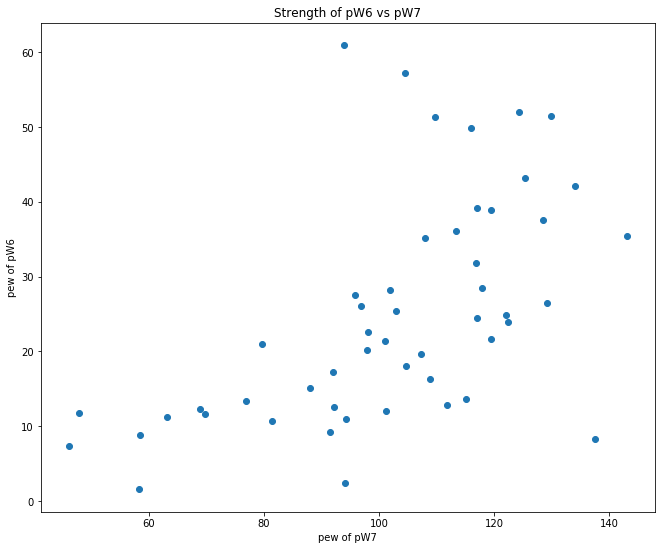

In [19]:
plt.scatter(my_list7, my_list)
#plt.errorbar(my_list7 , my_list, xerr = err7 , yerr = err6 , fmt='o')
plt.title('Strength of pW6 vs pW7')
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11 , 9)

### Classifying
Boundaries pulled from https://iopscience.iop.org/article/10.1088/0004-637X/773/1/53/pdf

CL SNe: pW6 (Si ii 5972) > 30 Å,

BL SNe: pW7 (Si ii 6355) > 105 Å and pW6 (Si ii 5972) < 30 Å,

SS SNe: pW7 (Si ii 6355) < 70 Å,

CN SNe: 70 <= pW7 (Si ii 6355) <= 105 Å and pW6 (Si ii 5972) <= 30 Å.

probably gonna do something with for obj_id in both loop above and create a smaller df for 6 and 7 and then specify which measurements fit each bound and then add them to a separate list of subclass data, then plot all subclass data

In [22]:
index6 = group6.set_index(['obj_id', 'time'])
index7 = group7.set_index(['obj_id', 'time'])
index6['phase6'] = all_phases6
index7['phase7'] = all_phases7
joined = index6.join(index7, lsuffix = '6', rsuffix = '7')
joined.dropna(subset = ['pew6' , 'pew7'])

feat_name6  feat_start6  feat_end6          vel6  vel_err6  \
obj_id time                                                                    
2004ef 2453255.66        pW6    5601.6630  5840.2589  11669.096575       0.0   
       2453256.68        pW6    5603.7447  5849.8107  11593.720866       0.0   
       2453257.77        pW6    5647.4723  5842.7322  11701.562122       0.0   
       2453258.68        pW6    5642.7197  5857.0505  10967.600997       0.0   
       2453262.61        pW6    5647.5312  5883.5308  10727.169551       0.0   
...                      ...          ...        ...           ...       ...   
2009ad 2454885.59        pW6    5661.7459  5960.4454   8593.369091       0.0   
       2454888.60        pW6    5682.4479  5960.4454           NaN       0.0   
2009ag 2454885.63        pW6    5633.9593  5911.3724   9034.494152       0.0   
       2454886.70        pW6    5639.9900  5917.4031   8889.605864       0.0   
       2454888.68        pW6    5667.1283  5926.4492   8646.254928       0.0   

                   vel_samperr6       pew6  pew_err6  pew_samperr6  \
obj_id time                                                          
2004ef 2453255.66    136.681639  26.028839       0.0      2.733116   
       2453256.68     55.818857  22.300215       0.0      1.374518   
       2453257.77    219.064171  21.244012       0.0      2.252428   
       2453258.68    183.980231  26.574584       0.0      2.365684   
       2453262.61     54.823270  23.582612       0.0      1.237821   
...                         ...        ...       ...           ...   
2009ad 2454885.59    193.505828  11.664371       0.0      1.003481   
       2454888.60           NaN  15.125931       0.0      1.536036   
2009ag 2454885.63     32.615775  17.969526       0.0      0.601860   
       2454886.70     51.451016  19.928191       0.0      0.937503   
       2454888.68     33.088180  19.644024       0.0      0.555191   

                          area6  ...  pew_err7  pew_samperr7         area7  \
obj_id time                      ...                                         
2004ef 2453255.66  7.720622e-15  ...       0.0      5.858569  4.826259e-14   
       2453256.68  7.398361e-15  ...       0.0      3.574235  4.658254e-14   
       2453257.77  1.264405e-14  ...       0.0      6.710786  5.923102e-14   
       2453258.68  7.453931e-15  ...       0.0      4.902431  3.729839e-14   
       2453262.61  8.682591e-15  ...       0.0      2.127390  4.384620e-14   
...                         ...  ...       ...           ...           ...   
2009ad 2454885.59  1.228195e-14  ...       0.0      1.061036  6.197324e-14   
       2454888.60  1.324812e-14  ...       0.0      1.799499  5.179187e-14   
2009ag 2454885.63  1.005248e-13  ...       0.0      0.498353  5.421345e-13   
       2454886.70  1.205664e-13  ...       0.0      0.430947  6.161465e-13   
       2454888.68  1.411399e-13  ...       0.0      0.751064  7.031972e-13   

                   area_err7  area_samperr7  spec_flag7  feat_flag7 notes7  \
obj_id time                                                                  
2004ef 2453255.66        0.0   2.520376e-15         0.0         0.0    NaN   
       2453256.68        0.0   1.285279e-15         0.0         0.0    NaN   
       2453257.77        0.0   4.607569e-15         0.0         0.0    NaN   
       2453258.68        0.0   1.722811e-15         0.0         0.0    NaN   
       2453262.61        0.0   9.623319e-16         0.0         0.0    NaN   
...                      ...            ...         ...         ...    ...   
2009ad 2454885.59        0.0   1.195763e-15         0.0         0.0    NaN   
       2454888.60        0.0   1.636924e-15         0.0         0.0    NaN   
2009ag 2454885.63        0.0   3.505795e-15         0.0         0.0    NaN   
       2454886.70        0.0   3.302273e-15         0.0         0.0    NaN   
       2454888.68        0.0   6.725000e-15         0.0         0.0    NaN   

                   phase7  phase7  


In [79]:
cl_data = joined[(joined['pew6'] > 30)]
cl_data.dropna(subset = ['pew6', 'pew7'])
cl_data = cl_data.loc[:,~cl_data.columns.duplicated()]

clx = cl_data['pew7']
cly = cl_data['pew6']

cl_list = cl_data.index.tolist()
cl_ids = [i[0] for i in cl_list]
cl_ids = np.unique(cl_ids)

def intersection(lst1, lst2): 
    return (set(lst1) & set(lst2))
both_cl = intersection(clx, cly)

cl_data.reset_index()

my_list_clx = []
my_list_cly = []
for obj_id in cl_ids:
    dfx = cl_data.loc[obj_id]
    t0_measureclx = np.interp(0, dfx['phase7'], dfx['pew7'])
    my_list_clx.append(t0_measureclx)
    dfy = cl_data.loc[obj_id]
    t0_measurecly = np.interp(0, dfy['phase6'], dfy['pew6'])
    my_list_cly.append(t0_measurecly)

24

In [80]:
bl_data = joined[(joined['pew6']<30) & (joined['pew7']>105)]
bl_data.dropna(subset = ['pew6', 'pew7'])
bl_data = bl_data.loc[:,~bl_data.columns.duplicated()]

blx = bl_data['pew7']
bly = bl_data['pew6']

bl_list = bl_data.index.tolist()
bl_ids = [i[0] for i in bl_list]
bl_ids = np.unique(bl_ids)

bl_data.reset_index()

my_list_blx = []
my_list_bly = []
for obj_id in bl_ids:
    dfx2 = bl_data.loc[obj_id]
    t0_measureblx = np.interp(0, dfx2['phase7'], dfx2['pew7'])
    my_list_blx.append(t0_measureblx)
    dfy2 = bl_data.loc[obj_id]
    t0_measurebly = np.interp(0, dfy2['phase6'], dfy2['pew6'])
    my_list_bly.append(t0_measurecly)

In [81]:
ss_data = joined[joined['pew7']<70]
ss_data.dropna(subset = ['pew6', 'pew7'])
ss_data = ss_data.loc[:,~ss_data.columns.duplicated()]

ssx = ss_data['pew7']
ssy = ss_data['pew6']

ss_list = ss_data.index.tolist()
ss_ids = [i[0] for i in ss_list]
ss_ids = np.unique(ss_ids)

ss_data.reset_index()

my_list_ssx = []
my_list_ssy = []
for obj_id in ss_ids:
    dfx3 = ss_data.loc[obj_id]
    t0_measuressx = np.interp(0, dfx3['phase7'], dfx3['pew7'])
    my_list_ssx.append(t0_measuressx)
    dfy3 = ss_data.loc[obj_id]
    t0_measuressy = np.interp(0, dfy3['phase6'], dfy3['pew6'])
    my_list_ssy.append(t0_measuressy)

In [82]:
cn_data3 = joined[70 <= joined['pew7']]
cn_data2 = cn_data3[cn_data3['pew7'] <=105]
cn_data = cn_data2[cn_data2['pew6'] <= 30]
cn_data.dropna(subset = ['pew6', 'pew7'])
cn_data = cn_data.loc[:,~cn_data.columns.duplicated()]

cnx = cn_data['pew7']
cny = cn_data['pew6']

cn_list = cn_data.index.tolist()
cn_ids = [i[0] for i in cn_list]
cn_ids = np.unique(cn_ids)

cn_data.reset_index()

my_list_cnx = []
my_list_cny = []
for obj_id in cn_ids:
    dfx4 = cn_data.loc[obj_id]
    t0_measurecnx = np.interp(0, dfx4['phase7'], dfx4['pew7'])
    my_list_cnx.append(t0_measurecnx)
    dfy4 = cn_data.loc[obj_id]
    t0_measurecny = np.interp(0, dfy4['phase6'], dfy4['pew6'])
    my_list_cny.append(t0_measurecny)

###### cly = [i for i in my_list if i > 30]
#blx = [j for j in my_list7 if j > 105]
#bly = [k for k in my_list if k < 30]
#ssx = [l for l in my_list7 if l < 70]
#cnx = [m for m in my_list7 if m >= 70 and m <= 105]
#cny = [n for n in my_list if n <= 30]

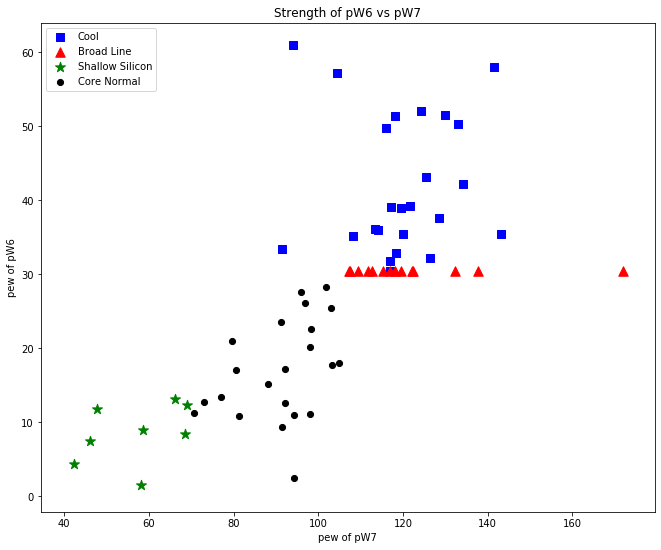

In [84]:
#cool
plt.scatter(my_list_clx , my_list_cly , label = 'Cool' , s = 50 , color = 'blue' , marker = 's')
#plt.errorbar(clx , cly , xerr = cl_data['pew_samperr7'] , yerr = cl_data['pew_samperr6'] , fmt = 'none' , color = 'blue' , alpha = 0.3)
#broad line
plt.scatter(my_list_blx , my_list_bly , label = 'Broad Line' , s = 90 , color = 'red' , marker = '^')
#plt.errorbar(blx , bly , xerr = bl_data['pew_samperr7'] , yerr = bl_data['pew_samperr6'] , fmt = 'none' , color = 'red' , alpha = 0.3)
#shallow silicon
plt.scatter(my_list_ssx , my_list_ssy , label = 'Shallow Silicon' , s = 110 , color = 'green' , marker = '*')
#plt.errorbar(ssx , cly , xerr = cl_data['pew_samperr7'] , yerr = cl_data['pew_samperr6'] , fmt = 'none' , color = 'blue' , alpha = 0.3)
#core normal
plt.scatter(my_list_cnx , my_list_cny , label = 'Core Normal' , s = 150 , color = 'black' , marker = '.')

plt.title('Strength of pW6 vs pW7')
plt.legend(loc = ('upper left'))
plt.xlabel('pew of pW7')
plt.ylabel('pew of pW6')
figure = plt.gcf()
figure.set_size_inches(11, 9)
plt.savefig('final_pw6_vs_pw7')